In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

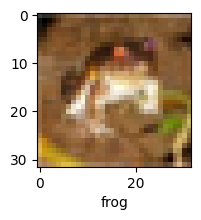

In [ ]:
plot_sample(X_train,y_train,0)

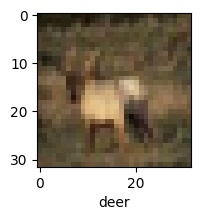

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')

])
ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.3055 - loss: 1.9273
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 95ms/step - accuracy: 0.4215 - loss: 1.6383
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 88ms/step - accuracy: 0.4539 - loss: 1.5503
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.4741 - loss: 1.4886
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 78ms/step - accuracy: 0.4942 - loss: 1.4344


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.48      0.53      1000
           1       0.59      0.63      0.61      1000
           2       0.42      0.23      0.29      1000
           3       0.37      0.35      0.36      1000
           4       0.38      0.49      0.43      1000
           5       0.51      0.25      0.34      1000
           6       0.44      0.68      0.53      1000
           7       0.60      0.50      0.55      1000
           8       0.53      0.72      0.61      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [ ]:
cnn = models.Sequential([
    # First convolutional block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second convolutional block
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Fully connected (dense) layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3798 - loss: 1.6929
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6107 - loss: 1.1064
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6645 - loss: 0.9600
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7026 - loss: 0.8659
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7281 - loss: 0.7836
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7498 - loss: 0.7234
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7673 - loss: 0.6730
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7832 - loss: 0.6212
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7977 - loss: 0.5782
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8135 - loss: 0.5303


In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

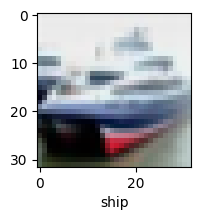

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
y_test[6]

np.uint8(1)

In [ ]:
y_classes[6]

np.int64(1)

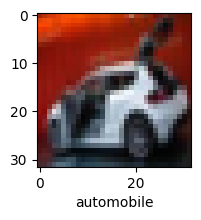

In [ ]:
plot_sample(X_test,y_test,6)

In [ ]:
classes[y_classes[6]]

'automobile'

In [ ]:
print("Classification Report:\n", classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      1000
           1       0.75      0.88      0.81      1000
           2       0.58      0.59      0.59      1000
           3       0.52      0.54      0.53      1000
           4       0.62      0.69      0.65      1000
           5       0.64      0.58      0.61      1000
           6       0.74      0.79      0.77      1000
           7       0.78      0.73      0.76      1000
           8       0.83      0.81      0.82      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

